In [1]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
from numba import jit, njit, prange

In [2]:
@jit(nopython=True, parallel=True)
def initial_state_generator(L, initial_filling):
    state = np.zeros((L), dtype=np.uint8)

    filled_sites_float = np.round(L * initial_filling)
    filled_sites = np.uintc(filled_sites_float)

    filled_sites_arr = np.arange(0, L)
    rn.shuffle(filled_sites_arr)

    for i in prange(filled_sites):
        state[filled_sites_arr[i]] = 1
    
    return state


In [7]:
@jit(nopython=True)
def thermalization(therm_step_no, L, state, alpha, beta):
    for i in range(therm_step_no):
        for j in range(L):
            selected_site = rn.randint(L)

            if selected_site == 0:

                if state[selected_site] == 0:
                    insert_rn = rn.rand()
                    if insert_rn <= alpha:
                        state[selected_site] = 1

                elif state[selected_site] == 1 and state[selected_site + 1] == 0:
                    state[selected_site] = 0
                    state[selected_site + 1] = 1
            
            elif selected_site == L - 1 and state[selected_site] == 1:

                exit_rn = rn.rand()
                if exit_rn <= beta:
                    state[selected_site] = 0
            
            else:
                if state[selected_site] == 1 and state[selected_site + 1] == 0:

                    state[selected_site] = 0
                    state[selected_site + 1] = 1
        
        # print(f'{i + 1} ---- {state} ---- {state.mean()}')

        return state


@jit(nopython=True)
def simulation(mc_step_no, L, state, alpha, beta):
    total_no_density = 0
    site_av_no_density_arr = np.zeros((L))

    for i in range(mc_step_no):
        for j in range(L):
            selected_site = rn.randint(L)

            if selected_site == 0:

                if state[selected_site] == 0:
                    insert_rn = rn.rand()
                    if insert_rn <= alpha:
                        state[selected_site] = 1

                elif state[selected_site] == 1 and state[selected_site + 1] == 0:
                    state[selected_site] = 0
                    state[selected_site + 1] = 1
            
            elif selected_site == L - 1 and state[selected_site] == 1:

                exit_rn = rn.rand()
                if exit_rn <= beta:
                    state[selected_site] = 0
            
            else:
                if state[selected_site] == 1 and state[selected_site + 1] == 0:

                    state[selected_site] = 0
                    state[selected_site + 1] = 1
        
        # print(f'{i + 1} ---- {state} ---- {state.mean()}')
        if (i + 1) % 10 == 0:
            total_no_density += state.mean()
            site_av_no_density_arr += state

    return total_no_density * 10 / mc_step_no, site_av_no_density_arr * 10 / mc_step_no



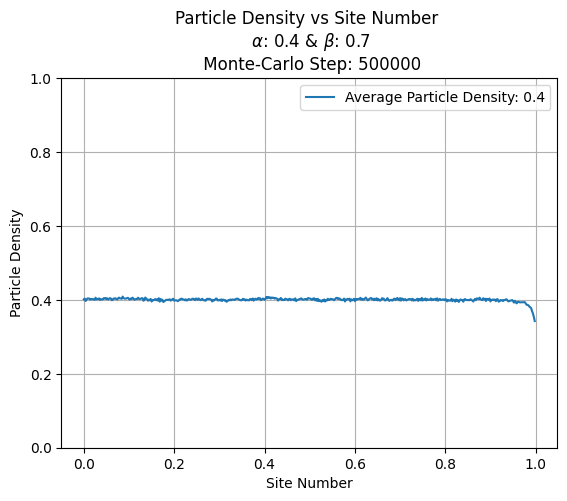

In [10]:
L = 500
initial_filling_factor = 0.1
alpha = 0.4
beta = 0.7

mc_step_no = 500000
therm_step_no = mc_step_no
steps_skip = 10

state = initial_state_generator(L, initial_filling_factor)
# print(state)

state = thermalization(therm_step_no, L, state, alpha, beta)
# print(state)

total_no_density, site_av_no_density_arr = simulation(mc_step_no, L, state, alpha, beta)

# print(total_no_density)
# print(site_av_no_density_arr)

site_pos = np.arange(0, L) / L

plt.plot(site_pos, site_av_no_density_arr, label=f"Average Particle Density: {np.around(total_no_density, decimals=3)}")
plt.ylim(0, 1)
plt.title(f"Particle Density vs Site Number \n $\\alpha$: {alpha} & $\\beta$: {beta} \n Monte-Carlo Step: {mc_step_no}")
plt.xlabel("Site Number")
plt.ylabel("Particle Density")
plt.legend()
plt.grid()
plt.show()
